
# Predicting the Price of Used Cars Using Machine Learning Algorithms
<font color = 'Blue'> 
Names: Shin Le, Jeongyeon Kim, Benjamin Horvath, Nico Reategui, Paul Giglio


Proposal: https://docs.google.com/document/d/1zhQrkWmJjjMU6wIfBC78MygGzp-XUrkaUOWALfyAL9Q/edit

Dataset: https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023/data

<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents

1. [About Dataset](#1)
1. [Importing Libraries](#2)
1. [Functions Implementation](#3)
1. [Loading Data](#4)
1. [Data Preprocessing](#5)
1. [Exploratory Data Analysis (EDA)](#6)
1. [Data Splitting](#7)
1. [Models Evaluations and Predictions](#8)
   1. [*Full Model* with *Linear Regression*](#81)
   1. [Using Sequential Feature Selection for the *Linear Regression*](#82)
   1. [*Decision Tree*](#83)
   1. [*A Pruned Tree*](#84)
   1. [Ensemble Method: *Random Forest Regression*](#85)
   1. [Ensemble Method: *Gradient Boosting Regression*](#86)
   1. [*Support Vector Machine* (SVM)](#87)


<a id="1"></a>
<font color = 'blue'> 
## **1. About Dataset**

<a id="2"></a>
<font color = 'blue'> 
## **2. Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
%matplotlib inline  # Ensures that Matplotlib plots are displayed inline

import statsmodels.api as sm


#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder 




UsageError: unrecognized arguments: # Ensures that Matplotlib plots are displayed inline


<a id="3"></a>
<font color = 'blue'> 
## **3. Functions Implementation**


<a id="4"></a>
<font color = 'blue'> 
## **4. Loading Data**

<div class="alert alert-block alert-warning">
<b>Note:</b>

You have to update the link if there is an error when you load data. 

* Open **Github** -> Open the dataset - **germanycars.csv** --> Click "**View Raw**" --> **Copy the link**

You must save before you are able to **Commit & Push** 
* You can go to **File --> Auto Save**
</div>


In [5]:
'''
# Define the URL of the CSV file on GitHub
csv_url = "https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/germanycars.csv?token=GHSAT0AAAAAACIQMGDUI2ZHP5YRJCPW4ZVKZJ37DUA"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)

# Now you have the data in the 'df' DataFrame'''

'\n# Define the URL of the CSV file on GitHub\ncsv_url = "https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/germanycars.csv?token=GHSAT0AAAAAACIQMGDUI2ZHP5YRJCPW4ZVKZJ37DUA"\n\n# Read the CSV file into a DataFrame\ndf = pd.read_csv(csv_url)\n\n# Now you have the data in the \'df\' DataFrame'

In [6]:
import requests
import zipfile
import io
import os
import pandas as pd
from os.path import expanduser

# URL of the ZIP file
url = "https://github.com/syl21b/Car-Price-Prediction/raw/main/cars.csv.zip"

# Directory to save extracted files in your home directory
output_directory = os.path.join(expanduser("~"), "car_data")

# Ensure the output directory exists or create it if not
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Send a GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    # Create a BytesIO object to work with the content
    zip_data = io.BytesIO(response.content)

    # Create a ZipFile object to extract the contents
    with zipfile.ZipFile(zip_data, 'r') as zip_ref:
        # Extract all files from the ZIP archive to the output directory
        zip_ref.extractall(output_directory)

    print("ZIP file has been successfully downloaded and extracted to the specified directory.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Load the CSV file into a DataFrame
csv_file_path = os.path.join(output_directory, "cars.csv")
df = pd.read_csv(csv_file_path)

# Now you can work with the 'df' DataFrame


ZIP file has been successfully downloaded and extracted to the specified directory.


<a id="5"></a>
<font color = 'blue'> 
## **5. Data Preprocessing**

In [7]:
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Mazda,CX-90 3.3 Turbo Premium Plus,2024,1.0,3.3L I6 Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,51K,White,0.0,NaN,1.0,Cox Mazda,3.2,NaN,0,NaN,54920
1,Mazda,CX-90 S Premium Plus,2024,1.0,3.3L,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,Artisan Red Metallic,White,0.0,NaN,1.0,Cox Mazda,3.2,NaN,0,NaN,61920
2,Acura,Integra A-Spec,2023,6.0,1.5L I4 16V GDI DOHC Turbo,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Red,Ebony,0.0,0.0,0.0,Glenview Luxury Imports,4.9,4.6,5,NaN,37434
3,Acura,Integra A-Spec Technology,2023,9705.0,1.5L I4 16V GDI DOHC Turbo,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ebony,0.0,1.0,1.0,Lindsay Acura,3.6,4.6,5,484.0,34516
4,Acura,Integra A-Spec Technology,2023,6.0,1.5L I4 16V GDI DOHC Turbo,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Performance,Orchid,0.0,NaN,1.0,Plaza Auto Mall,4.0,4.6,5,674.0,33221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758030,Toyota,Supra Turbo,1995,15800.0,3.0L I6 24V SPFI DOHC Turbo,6-Speed Manual,NaN,Gasoline,17-23,Black,Tan,0.0,0.0,1.0,Motorcar Classics,3.7,4.9,7,10000.0,89900
758031,Toyota,Supra Turbo,1995,44614.0,3.0L I6 Turbo,6-Speed Manual,Rear-wheel Drive,Gasoline,NaN,Silver,Black,0.0,NaN,1.0,Gold Coast Motors,NaN,4.9,7,6000.0,109900
758032,Volkswagen,Eurovan,1995,91849.0,2.5L I5,Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,0.0,1.0,1.0,Pacific Auto Center - Fontana,3.1,4.8,3,1000.0,31995
758033,Volkswagen,Eurovan Campmobile,1995,190336.0,5.2L I5 10V SOHC,5-Speed Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,0.0,1.0,1.0,Lot 99,1.4,4.8,3,1000.0,25995


In [8]:
# Sample data
df = pd.DataFrame(df)

# Use str.extract to create new columns
df[['Engine Displacement (L)', 'Engine Type', 'Engine Features']] = df['engine'].str.extract(r'(\d+\.\d+)L\s([A-Z0-9]+)\s(.+)$')

# Drop the original 'engine' column if you no longer need it
df = df.drop(columns=['engine'])

# Print the DataFrame
df

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,Engine Displacement (L),Engine Type,Engine Features
0,Mazda,CX-90 3.3 Turbo Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,51K,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,54920,3.3,I6,Turbo
1,Mazda,CX-90 S Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,Artisan Red Metallic,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,61920,NaN,NaN,NaN
2,Acura,Integra A-Spec,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Red,Ebony,...,0.0,Glenview Luxury Imports,4.9,4.6,5,NaN,37434,1.5,I4,16V GDI DOHC Turbo
3,Acura,Integra A-Spec Technology,2023,9705.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ebony,...,1.0,Lindsay Acura,3.6,4.6,5,484.0,34516,1.5,I4,16V GDI DOHC Turbo
4,Acura,Integra A-Spec Technology,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Performance,Orchid,...,1.0,Plaza Auto Mall,4.0,4.6,5,674.0,33221,1.5,I4,16V GDI DOHC Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758030,Toyota,Supra Turbo,1995,15800.0,6-Speed Manual,NaN,Gasoline,17-23,Black,Tan,...,1.0,Motorcar Classics,3.7,4.9,7,10000.0,89900,3.0,I6,24V SPFI DOHC Turbo
758031,Toyota,Supra Turbo,1995,44614.0,6-Speed Manual,Rear-wheel Drive,Gasoline,NaN,Silver,Black,...,1.0,Gold Coast Motors,NaN,4.9,7,6000.0,109900,3.0,I6,Turbo
758032,Volkswagen,Eurovan,1995,91849.0,Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Pacific Auto Center - Fontana,3.1,4.8,3,1000.0,31995,NaN,NaN,NaN
758033,Volkswagen,Eurovan Campmobile,1995,190336.0,5-Speed Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Lot 99,1.4,4.8,3,1000.0,25995,5.2,I5,10V SOHC


In [9]:
df.info() #shows a summary of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758035 entries, 0 to 758034
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   manufacturer             758035 non-null  object 
 1   model                    758035 non-null  object 
 2   year                     758035 non-null  int64  
 3   mileage                  757556 non-null  float64
 4   transmission             748437 non-null  object 
 5   drivetrain               738562 non-null  object 
 6   fuel_type                736897 non-null  object 
 7   mpg                      618001 non-null  object 
 8   exterior_color           749327 non-null  object 
 9   interior_color           701666 non-null  object 
 10  accidents_or_damage      733946 non-null  float64
 11  one_owner                728680 non-null  float64
 12  personal_use_only        733840 non-null  float64
 13  seller_name              749497 non-null  object 
 14  sell

* Check and drop **Null** values

In [10]:
df.isnull().sum()

manufacturer                    0
model                           0
year                            0
mileage                       479
transmission                 9598
drivetrain                  19473
fuel_type                   21138
mpg                        140034
exterior_color               8708
interior_color              56369
accidents_or_damage         24089
one_owner                   29355
personal_use_only           24195
seller_name                  8538
seller_rating              211417
driver_rating               29889
driver_reviews_num              0
price_drop                 349357
price                           0
Engine Displacement (L)    116417
Engine Type                116417
Engine Features            116417
dtype: int64

There is null value in **fuel_consumption_g_km** column. So, we need to drop these before using it

In [11]:
df=df.dropna().reset_index(drop=True)

* Check and drop duplicates:

In [12]:
df=df.drop_duplicates()

The data set after cleaning up

In [13]:
df

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,Engine Displacement (L),Engine Type,Engine Features
0,Acura,Integra A-Spec Technology,2023,9705.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ebony,...,1.0,Lindsay Acura,3.6,4.6,5,484.0,34516,1.5,I4,16V GDI DOHC Turbo
1,Acura,Integra A-Spec,2023,6612.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Apex Blue Pearl,Ebony,...,1.0,Audi Fort Myers,4.6,4.6,5,2000.0,32995,1.5,I4,16V GDI DOHC Turbo
2,Acura,Integra A-Spec Technology,2023,75.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Performance Red Pearl,Orchid,...,0.0,Lindsay Acura,3.6,4.6,5,338.0,34662,1.5,I4,16V GDI DOHC Turbo
3,Acura,Integra A-Spec,2023,2824.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Liquid Carbon Metallic,Ebony,...,0.0,Friendly Acura Of Middletown,4.9,4.6,5,500.0,31400,1.5,I4,16V GDI DOHC Turbo
4,Acura,Integra A-Spec,2023,5689.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ivory / Black,...,1.0,Napleton's Arlington Heights Chrysler Dodge Je...,4.4,4.6,5,500.0,31495,1.5,I4,16V GDI DOHC Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223952,Porsche,911 Carrera Cabriolet,1995,38427.0,6-Speed Manual,Rear-wheel Drive,Gasoline,17-25,Midnight Blue Metallic,Cashmere,...,1.0,Diamond Motorworks,4.5,4.7,16,3000.0,86800,3.6,H6,MPFI SOHC
223953,Porsche,911 Carrera Cabriolet,1995,55638.0,6-Speed Manual,Rear-wheel Drive,Gasoline,17-25,Grand Prix White,Red,...,0.0,Diamond Motorworks,4.5,4.7,16,3000.0,84800,3.6,H6,MPFI SOHC
223954,Porsche,911 Carrera Cabriolet,1995,54400.0,6-Speed Manual,Rear-wheel Drive,Gasoline,17-25,Red,Black,...,1.0,Porsche Delaware,4.5,4.7,16,2180.0,127795,3.6,H6,MPFI SOHC
223955,Toyota,4Runner SR5 V6,1995,200331.0,5-Speed Manual,4WD,Gasoline,13-16,Dark Gray Metallic,Gray,...,1.0,Columbia Motors,2.9,4.2,8,500.0,9991,3.0,V6,SPFI SOHC


* Counting the data for each feature:

In [14]:
for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")

Toyota           18917
Ford             18540
Jeep             14993
Nissan           13987
Chevrolet        13830
Kia              12134
Honda            11967
BMW              11194
Mercedes-Benz    11078
Subaru            9166
Volkswagen        8382
GMC               7752
Lexus             7719
Hyundai           7606
Dodge             7455
Audi              6242
Mazda             5673
Cadillac          5201
Buick             4862
Lincoln           3630
Chrysler          3246
Volvo             3035
RAM               3005
Porsche           2937
INFINITI          2666
Acura             2611
Land Rover        1993
Mitsubishi        1435
Jaguar             607
Name: manufacturer, dtype: int64, 

Sportage LX         1271
Fusion SE            999
Explorer XLT         991
Rogue SV             945
CX-5 Touring         942
                    ... 
XJR LWB                1
XJ Supercharged        1
QX60 Hybrid Base       1
Q60 IPL Base           1
Corolla DX             1
Name: model, Length: 4

We can observe the presence of outliers, and the data spans a wide range.

<a id="6"></a>
<font color = 'blue'> 
## **6. Exploratory Data Analysis (EDA)**

## **Dectecting outliers**
* ### **For numerical columns**

Getting numerical columns

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#numerical_cols.remove('Senior Citizen')
num_columns=df[numerical_cols]

* Mean Car Price by year with outliers

<div class="alert alert-block alert-warning">
<b>Note:</b>  This method is just applied for <b>numerical features</b>. <br>
There is no specific way to detect outlier for <b>categorical columns</b>. We can plot the Frequency vs Price for each categorical columns, and then decide the outliers depend on the frequency.
</div>


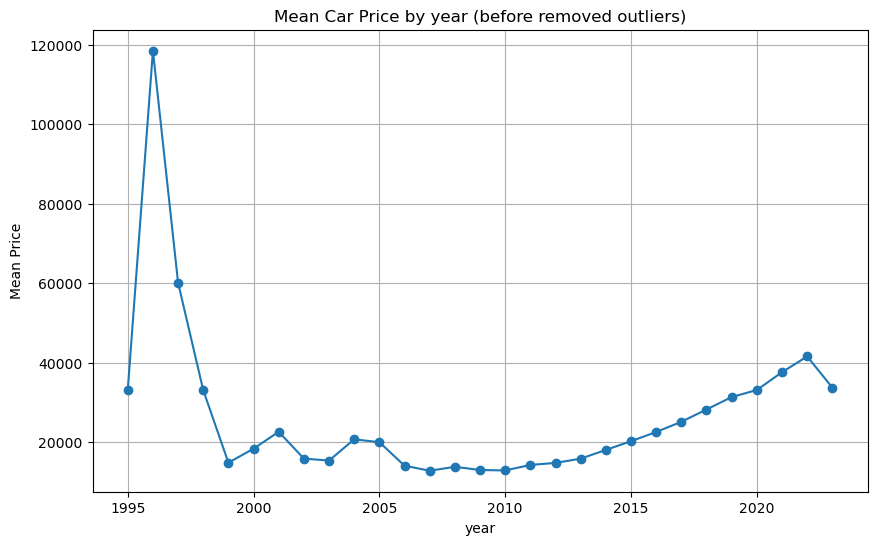

In [16]:

mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Mean Car Price by year (before removed outliers)')
plt.xlabel('year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [17]:


Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_columns = num_columns[~outliers_mask]

In [18]:
numerical_cols

['year',
 'mileage',
 'accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'seller_rating',
 'driver_rating',
 'driver_reviews_num',
 'price_drop',
 'price']

This is new numerical columns after removed the outliers

In [19]:
new_num_columns= num_columns.dropna() #drop the rows which are contain NAN 
new_num_columns

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,2023.0,9705.0,0.0,1.0,1.0,3.6,4.6,5.0,484.0,34516.0
1,2023.0,6612.0,0.0,1.0,1.0,4.6,4.6,5.0,2000.0,32995.0
2,2023.0,75.0,0.0,1.0,0.0,3.6,4.6,5.0,338.0,34662.0
3,2023.0,2824.0,0.0,1.0,0.0,4.9,4.6,5.0,500.0,31400.0
4,2023.0,5689.0,0.0,1.0,1.0,4.4,4.6,5.0,500.0,31495.0
...,...,...,...,...,...,...,...,...,...,...
217501,2011.0,95621.0,0.0,0.0,1.0,3.6,4.5,21.0,300.0,10499.0
217502,2011.0,67901.0,0.0,0.0,1.0,3.9,4.5,21.0,1000.0,17995.0
217507,2011.0,56490.0,0.0,1.0,1.0,4.4,4.6,38.0,2000.0,11995.0
217508,2011.0,100146.0,0.0,0.0,1.0,4.1,4.6,38.0,1000.0,11997.0


* Plot Average Price vs Years ((after removed outliers))


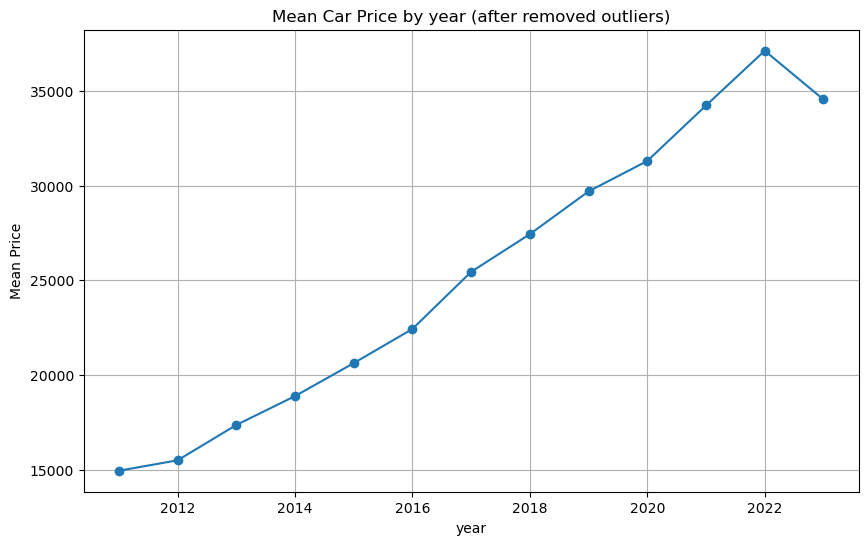

In [20]:

mean_prices_by_year = new_num_columns.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Mean Car Price by year (after removed outliers)')
plt.xlabel('year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [21]:
# Define the edges (ranges)
edges = [0, 5000, 10000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000,  300000]

# Create labels
labels = ['0-5', '5-10', '10-30', '30-50', '50-70','70-90','90-110','110-130','130-150','150-170','170-190','190-210','210-300']

# Using pd.cut, divide the 'mileage_ranges' column into bins with labels
new_num_columns['mileage_ranges'] = pd.cut(new_num_columns['mileage_in_km'], bins=edges, labels=labels)

# Reorder the categories of the 'mileage_ranges' column
new_num_columns['mileage_ranges'] = pd.Categorical(new_num_columns['mileage_ranges'], categories=labels, ordered=True)

# Group the data by the 'mileage_ranges' column and count the frequency of each range
value_counts = new_num_columns['mileage_ranges'].value_counts()

# Sort the values based on the category order
value_counts = value_counts.sort_index()

# Create the bar plot
fig, ax = plt.subplots()
value_counts.plot(ax=ax, kind='bar', xlabel='Mileage Ranges (in thousands)', ylabel='Frequency')
plt.show()


KeyError: 'mileage_in_km'

In [ ]:
# Convert 'mileage_in_km' column to numeric if it's not already
new_num_columns['mileage_in_km'] = pd.to_numeric(new_num_columns['mileage_in_km'], errors='coerce')

# Define the number of bins and calculate the range based on the data
num_bins = 15
min_range = 0
max_range = new_num_columns['mileage_in_km'].max()

# Create labels with custom ranges
bin_size = (max_range - min_range) / num_bins
labels = [f'{int(min_range + i * bin_size)}-{int(min_range + (i + 1) * bin_size)}' for i in range(num_bins)]

# Using pd.cut, divide the 'mileage_in_km' column into bins with labels
new_num_columns['mileage_ranges'] = pd.cut(new_num_columns['mileage_in_km'], bins=num_bins, labels=labels, include_lowest=True)


# Create the bar plot
fig, ax = plt.subplots()
value_counts = new_num_columns['mileage_ranges'].value_counts()
value_counts[labels].plot(ax=ax, kind='bar', xlabel='Mileage Ranges', ylabel='Frequency')
plt.show()

* ### **For categorical columns:**
We need to plot them vs Price to see the pattern

In [ ]:
cat_columns=['brand','transmission_type','fuel_type', 'color' ] #these are the columns that wee need to plot se dectect the outliers

In [ ]:

# Create a figure with multiple subplots
fig = plt.figure(figsize=(10, 5 * len(cat_columns)))
for i, cat_feature in enumerate(cat_columns):
    ax = fig.add_subplot(len(cat_columns), 1, i + 1)
    df[cat_feature].value_counts().plot(ax=ax, kind='bar', xlabel=cat_feature, ylabel='Frequency')
    ax.set_title(cat_feature)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">
<b>Discussion:</b>  `Based on these plots for categorical features, we can decide how much data we can remove`
</div>

Let's drop these classes from categorical columns:<br>

* `Unknow`, `Semi-automatic` from `transmission_type` column<br>
* `LPG`, `CNG`, `Diesel Hybrid`, `Hydrogen`, `Electric`, `Ethanol` from `fuel_type` columns

### **!!! We can drop more class if we needed**

In [ ]:
df = df.loc[~df['fuel_type'].isin(['LPG', 'CNG', 'Diesel Hybrid', 'Hydrogen', 'Electric', 'Ethanol'])]
df = df.loc[~df['transmission_type'].isin(['Unknown', 'Semi-automatic'])]
#reset the index
df.reset_index(drop=True)

In [ ]:
'''data= pd.concat([new_num_columns , cat_columns, Y], axis=1)
data = data.dropna().reset_index(drop=True)
data.info()'''